# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Import everthing else that is required
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

#reading in an image
import glob
import matplotlib.image as mpimg

# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
validation_file="data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Let me see the size of it!
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_Validation shape:", X_valid.shape)
print("y_Validation shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_Validation shape: (4410, 32, 32, 3)
y_Validation shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


# My Actions: Get the required Data

Firstly I imported all reqired dependencies here in this cell.

The traininig, validation and test data are in top most level.
I couldnt find a way to retrive the dat from there so brought it into the main project workspace and assigned the path accordingly.

Printed out the shape of the training, validation and test datasets and their contents are as follows:

Training dataset: 34799 objects of size 32x32 in RGB
Validation dataset : 4410 objects of size 32x32 in RGB
Test dataset : 12630 objects of size 32x32 in RGB


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.

# I know that there are 43 different kinds of Traffic signs and the output has to be classified into one of these types
# the number of types of Y has to be terefore 43
# Assuming the training set contains each one of these types atleast once the numpy unique of y_train array should return 43
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


# My actions: Assigning the number of training, test and number of classes

I have already printed out the shapes of the dataset and I therefore know the number of training and test data that is available. I also know that there are 43 different types of traffic signs and there fore the number of classes for the classifier is 43.

The variables were assigned accordingly and printed out.
Obviously they also match with the output print outs from the previous cell

I could have also assigned these manualy

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

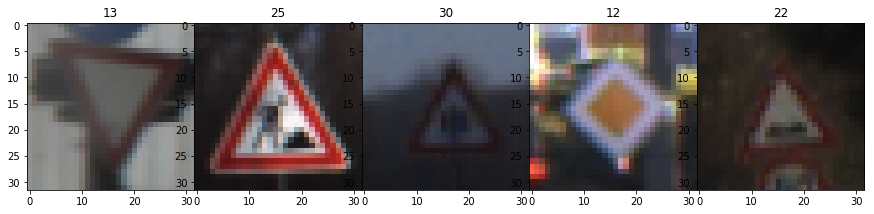

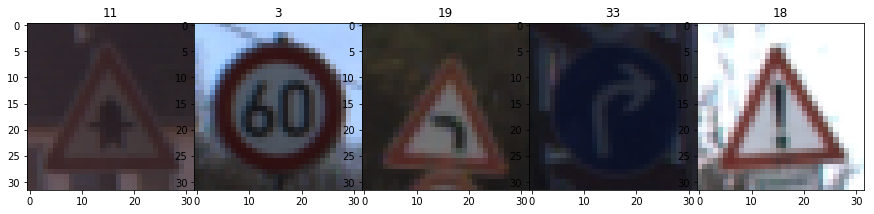

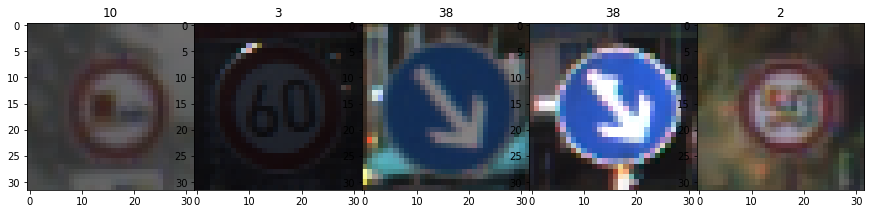

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# show image of 5 random data points of the training set
fig, axs = plt.subplots(1,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('on')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])
    
# show image of 5 random data points of the validation set
fig, axs = plt.subplots(1,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    index = random.randint(0, len(X_valid))
    image = X_valid[index]
    axs[i].axis('on')
    axs[i].imshow(image)
    axs[i].set_title(y_valid[index])
    
# show image of 5 random data points of the Testing set
fig, axs = plt.subplots(1,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    index = random.randint(0, len(X_test))
    image = X_test[index]
    axs[i].axis('on')
    axs[i].imshow(image)
    axs[i].set_title(y_test[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

# My actions: Visualising Trafic sign and label

Randomly select 5 traffic signs from the Training, Validation and Test datasets

plot them along with their labels

Checked if the label corresponds to the traffic sign from the referenced list and found them to be OK

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Gray_scale image

#X_train_GS = cv2.cvtColor(X_train, cv2.COLOR_BGR2GRAY)
#X_valid_GS = cv2.cvtColor(X_valid, cv2.COLOR_BGR2GRAY)
#X_test_GS = cv2.cvtColor(X_test, cv2.COLOR_BGR2GRAY)

## Cant't seperate out individual images this way as required by cv2!!

# found an easier way!
# Reference: https://stackoverflow.com/questions/41971663/use-numpy-to-convert-rgb-pixel-array-into-grayscale

X_train_GS = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_GS = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_GS = np.sum(X_test/3, axis=3, keepdims=True)

print('Grayscale shape training:', X_train_GS.shape)
print('Grayscale shape Validation:', X_valid_GS.shape)
print('Grayscale shape Testing:', X_test_GS.shape)

Grayscale shape training: (34799, 32, 32, 1)
Grayscale shape Validation: (4410, 32, 32, 1)
Grayscale shape Testing: (12630, 32, 32, 1)


# My Actions: Image preprocessing 

Tried initialy to use the cv2 grayscaling comand but couldnt find a way to seperate out each image from the dataset

while searching for a better method found that it is enough to use np.sum and take an average of the RGB pixels
the resulting dataset then has a depth of 1 instead of 3. this also reduces the memory required for processing

Although in real life the colour of the traffic sign does have a meaning, for the classification it does not have a critical role and doesnot justify taking up 3 times more size

In [5]:
# Normalise the images

X_train_Nor = (X_train_GS - 128)/128
X_valid_Nor = (X_valid_GS - 128)/128
X_test_Nor = (X_test_GS - 128)/128

Original shape: (34799, 32, 32, 3)
Normalized shape: (34799, 32, 32, 1)
Original shape: (4410, 32, 32, 3)
Normalized shape: (4410, 32, 32, 1)
Original shape: (12630, 32, 32, 3)
Normalized shape: (12630, 32, 32, 1)


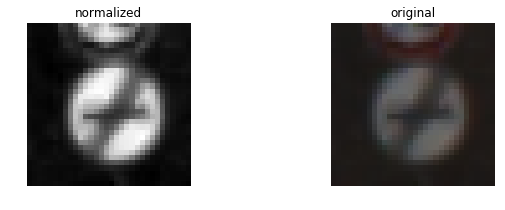

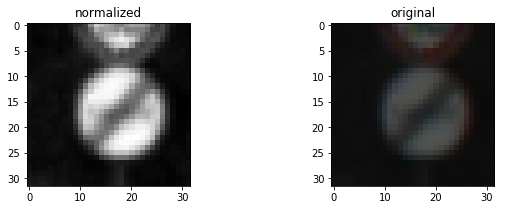

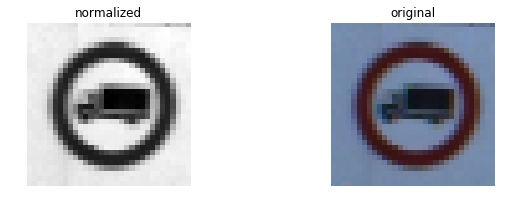

In [6]:
# Visualize rgb vs grayscale+Normalised training image
print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_Nor.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_Nor[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[0].squeeze())

# Visualize rgb vs grayscale+Normalised Validation image
print("Original shape:", X_valid.shape)
print("Normalized shape:", X_valid_Nor.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('on')
axs[0].set_title('normalized')
axs[0].imshow(X_valid_Nor[0].squeeze(), cmap='gray')

axs[1].axis('on')
axs[1].set_title('original')
axs[1].imshow(X_valid[0].squeeze())

# Visualize rgb vs grayscale+Normalised test image
print("Original shape:", X_test.shape)
print("Normalized shape:", X_test_Nor.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_test_Nor[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_test[0].squeeze())

# My actions: Normalising the image

As learnt in the lecture this is an improtant preprocessing step where in the image is conditioned to improve the learning behavior.

Here the grayscaled image is centered and normalised (256 bits) 

To compare I plot the grayscaled, normalised image and the original image side by side for the Training, test and validation dataset

3


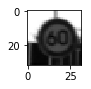

In [8]:
# random training data
# reference: classroom LeNet

index = random.randint(0, len(X_train))
image = X_train_Nor[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

Copied from the classroom LeNet excercise, to print a random training dataset image with index

10


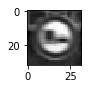

In [9]:
# random training data
# reference: classroom LeNet

index = random.randint(0, len(X_valid))
image = X_valid_Nor[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_valid[index])

Copied from the classroom LeNet excercise, to print a random validation dataset image with index

2


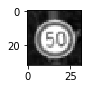

In [10]:
# random training data
# reference: classroom LeNet

index = random.randint(0, len(X_test))
image = X_test_Nor[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_test[index])

Copied from the classroom LeNet excercise, to print a random training dataset image with index

In [11]:
# preprocess data
# reference: classroom LeNet

X_train_Nor, y_train = shuffle(X_train_Nor, y_train)

# My actions: 
Shuffle the training dataset

### Model Architecture

In [12]:
# Set EPoch and Batch size here

EPOCHS = 80
BATCH_SIZE = 100

# My actions: Setting the Epoch and Batch_size

Tied several values for this Hyperparameter before setting them to 80 and 100.

eg. with Epoch =10 and Batch siye = 100 got an accuracy of 0.895, with the current setting the accuracy is above 0.935 as per the requirement

In [21]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### LeNet Architecture from Class room
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    # define weight and bias to derive the logit
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1    = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


# My Actions: LeNet Architecture

This code block has been copied from the LeNet excersice from the class room.
I will go through the steps to demonstrate my understanding of the LeNet architecture.

the hyperparameters of this architecture have been kept unchanged 
    mu = 0
    sigma = 0.1
   
This General formula for the convolustions always applies:
 Wout:   Output width
 Win:    Input width
 Hout:   Output width
 Hin:    Input width
 F:      filtersize
 s:      Stride
 p:      padding
 k:      number of filters

Wout = [(Win-F+2p)/s]+1
Hout = [(Hin-F+2p)/s]+1
Dout = K
    
1. In the first convolution: Input = 32x32x1. Output = 28x28x6.
   the weights and biases are set up for a depth of 6
   the stride is set to 1
2. RELU activation
3. Reduce size by only taking pixels of significance using max pooling:Input = 28x28x6. Output = 14x14x6
4. In the second convolution: Input = 14x14x6.Output = 10x10x16.
5. RELU activation and Drop out
6. Reduce size by only taking pixels of significance using max pooling:Input = 10x10x6. Output = 5x5x16
7. Flatten the pixels and get an output equal to 5x5x16 =400
8. This fully connected layer has Input =400. Output = 120 (y =xW +b)
9. RELU activation and drop out
10. This fully connected layer has Input =120. Output = 84 (y =xW +b) 
11. RELU activation
12. This fully connected layer has Input = 84. Output = 43 (y =xW +b) 
13. Logit = y

Note: during experimenting I initialy did not have the drop out code line. The training accuracy fluctuated from one Epoch to the next in the undesired direction. Eg. acuraccy would go from 0.935 to 0.910. With the drop out this also happened ocassionaly but the fluctuation in the undesired directionwas far less frequent and the step far lesser Eg. 0.935 to 0.932

Code source: Classroom lecture LeNet

In [14]:
# features and labels


x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # placeholder for drop rate probability of keeping
one_hot_y = tf.one_hot(y, 43)

# My actions
In this step the placeholders for x and y as well as the Keep probability are defined
one hot codding is done where in the correct classification of the traffic sign is set

Code source: Classroom lecture LeNet

In [15]:
# Training pipeline

rate = 0.0008

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# My actions:
The learning rate is set: I experimented with 0.00005, 0.0006, 0.0008, 0.0001, 0.0015 and 0.003 and the chose 0.0008 as the best suited value.
In this step the logits are called from the Lenet architecture.
The cross entropy of the logits are derived with reference to the one hot code.
The losses are minimised in successive steps by adjutment of the weights and biases with the desired learning rate

Code source: Classroom lecture LeNet

In [16]:
#Model Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [22]:
#Evaluate model

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# My actions:

I set the keep_prob to 1.0 meaning during evaluation there will be no drop outs

Code source: Classroom lecture LeNet

The correct prediction and prediction accuracies are calculated and the model is saved using the tf.train saver

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [49]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Train model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_Nor)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_Nor, y_train = shuffle(X_train_Nor, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_Nor[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5 })
            
        validation_accuracy = evaluate(X_valid_Nor, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.422

EPOCH 2 ...
Validation Accuracy = 0.703

EPOCH 3 ...
Validation Accuracy = 0.821

EPOCH 4 ...
Validation Accuracy = 0.854

EPOCH 5 ...
Validation Accuracy = 0.875

EPOCH 6 ...
Validation Accuracy = 0.893

EPOCH 7 ...
Validation Accuracy = 0.911

EPOCH 8 ...
Validation Accuracy = 0.915

EPOCH 9 ...
Validation Accuracy = 0.928

EPOCH 10 ...
Validation Accuracy = 0.927

EPOCH 11 ...
Validation Accuracy = 0.929

EPOCH 12 ...
Validation Accuracy = 0.933

EPOCH 13 ...
Validation Accuracy = 0.942

EPOCH 14 ...
Validation Accuracy = 0.943

EPOCH 15 ...
Validation Accuracy = 0.953

EPOCH 16 ...
Validation Accuracy = 0.950

EPOCH 17 ...
Validation Accuracy = 0.951

EPOCH 18 ...
Validation Accuracy = 0.956

EPOCH 19 ...
Validation Accuracy = 0.951

EPOCH 20 ...
Validation Accuracy = 0.953

EPOCH 21 ...
Validation Accuracy = 0.957

EPOCH 22 ...
Validation Accuracy = 0.955

EPOCH 23 ...
Validation Accuracy = 0.958

EPOCH 24 ...
Validation Accura

# My actions:

The training of the model is done on the grayscaled and normalised training dataset.
I have set the Keep_prob to 0.5 here meaning half will be randomly dropped out. I tried several values ranging from 0.3 to 1 and had varying results.
The model is then saved as "lenet".

My Training accuracy is 97.1 %

Code Source: classroom Lenet

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#Evaluate model

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_Nor, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.943


# Test Accuracy is 94.3% above the required 93%

The grayscaled and normalised Test dataset was fed as input to the model.
feeling confident to test it on downloaded traffic sign pics

### Predict the Sign Type for Each Image

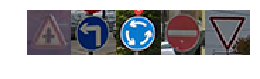

In [55]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

fig, axs = plt.subplots(1,5, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

Eval_images = []

for i, img in enumerate(glob.glob('Traffic_sign_examples/Random_testset_2/*.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    Eval_images.append(image)

#Store the images as an array
Eval_images = np.asarray(Eval_images)
#Grayscale the images
Eval_images_gry = np.sum(Eval_images/3, axis=3, keepdims=True)
#Normalise the images
Eval_images_normalised = (Eval_images_gry - 128)/128 
#show me the size of the Normalised images
#print(Eval_images_normalised.shape)

    #plt.imshow

# My actions: download traffic signs

Downloaded 38 German traffic signs from the Git hub and stored them on the workspace.
Grouped 5 traffic signs randomly to use for the evaluation.
Printed out the shape of the images:
    5 Images
    32x32 format
    1 depth 
    
Ploted the image
after refering to the signnames.csv file I know the image labels to be as follows:


    1. Right of way in the next intersection:          Label_1 = 11
    2. only left:                                      Label_2 = 34
    3. Roundabout mandatory:                           Label_3 = 40
    4. No entry                                        Label_4 = 17
    5. Yield:                                          Label_5 = 13

### Analyze Performance

In [56]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

#Label_1 = 11
#Label_2 = 34
#Label_3 = 40
#Label_4 = 17
#Label_5 = 13
Eval_labels = [11, 34, 40, 17, 13]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    Eval_accuracy = evaluate(Eval_images_normalised, Eval_labels)
    print("Test Set Accuracy = {:.3f}".format(Eval_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 1.000


# YUHU!! all traffic signs were properly classified

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [57]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.



softmax_l = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_l, k=3)

print (top_k)

# copied  from the evaluation cell

#Eval_labels = [11, 34, 40, 17, 13]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver4 = tf.train.import_meta_graph('./lenet.meta')
    saver4.restore(sess, "./lenet")
    softmax_logits = sess.run(softmax_l, feed_dict={x: Eval_images_normalised, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: Eval_images_normalised, keep_prob: 1.0})
print (my_top_k)

TopKV2(values=<tf.Tensor 'TopKV2:0' shape=(?, 3) dtype=float32>, indices=<tf.Tensor 'TopKV2:1' shape=(?, 3) dtype=int32>)
INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  9.99891639e-01,   5.85930975e-05,   2.77483014e-05],
       [  9.99999881e-01,   9.40017202e-08,   1.89596889e-08],
       [  9.98947442e-01,   6.53889729e-04,   3.97874770e-04],
       [  1.00000000e+00,   4.94291795e-11,   2.05781830e-13],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[11, 30, 27],
       [34, 35, 37],
       [40, 12,  7],
       [17, 14, 12],
       [13,  0,  1]], dtype=int32))


# Top 3 predictions

I can see that the traffic signs and the top 3 predictions are as follows:

    1. Right of way in the next intersection:          Label_1 = 11 (99.98%) , 30 (0.0058%), 27 (0.0027%)
    2. only left:                                      Label_2 = 34 (99.99%) , 35 (0.0000094%) , 37 (0.0000019%)
    3. Roundabout mandatory:                           Label_3 = 40 (99.89%) , 12 (0.00065%), 7(0.00039%)
    4. No entry                                        Label_4 = 17 (100 %)  , 14 (~ 0%), 12 (~0)
    5. Yield:                                          Label_5 = 13 (100 %)  , 0 (0%), 1(0%)
    
The prediction looks absolutely stunning to me It correctly predicts with a very high rate accurately. The remaining 2 predictions have a very low probability rate



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [25]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")